# This notebook contains:
    
# 1. Importing libraries and data and renaming columns

# 2. The elbow technique

# 3. k-means clustering

Importing libraries and data and renaming columns¶

Install and import all necessary libraries in your Jupyter notebook.

Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).
Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [70]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [71]:
#Defining and creating a folder path
path = r'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A6 Advanced Analytics Vancouver'


In [72]:
#double checking path
path

'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A6 Advanced Analytics Vancouver'

In [73]:
#Creating file path and importing listings dataset and checking
listings = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'cleaned_van_geo.csv'))
listings.shape

(6684, 10)

In [74]:
listings.head()

,Unnamed: 0,id,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365,calculated_host_listings_count
0,0,13188,Riley Park,49.247730,-123.105090,Entire home/apt,150.0,283,0,1
1,1,13221,Riley Park,49.254890,-123.097080,Entire home/apt,120.0,15,363,1
2,2,13358,Downtown,49.281174,-123.125931,Entire home/apt,165.0,493,0,1
3,3,13490,Kensington-Cedar Cottage,49.256220,-123.066070,Entire home/apt,150.0,101,92,1
4,4,14267,Kensington-Cedar Cottage,49.249220,-123.081390,Entire home/apt,150.0,33,17,1


In [75]:
#dropping some Unnamed
listings.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [76]:
# Checking dropped coloumns
listings.head()

,id,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365,calculated_host_listings_count
0,13188,Riley Park,49.247730,-123.105090,Entire home/apt,150.0,283,0,1
1,13221,Riley Park,49.254890,-123.097080,Entire home/apt,120.0,15,363,1
2,13358,Downtown,49.281174,-123.125931,Entire home/apt,165.0,493,0,1
3,13490,Kensington-Cedar Cottage,49.256220,-123.066070,Entire home/apt,150.0,101,92,1
4,14267,Kensington-Cedar Cottage,49.249220,-123.081390,Entire home/apt,150.0,33,17,1


In [77]:
listings.shape

(6684, 9)

In [78]:
#checking the list of columns 
listings.columns.to_list()

['id',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'number_of_reviews',
 'availability_365',
 'calculated_host_listings_count']

In [79]:
#double checking for missing values 
listings.isnull().sum()

id                                0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
number_of_reviews                 0
availability_365                  0
calculated_host_listings_count    0
dtype: int64

No missing values

In [80]:
#aggregating columnns 
agg = {'price':'first',
      'number_of_reviews':'first',
      'availability_365':'first',
      'calculated_host_listings_count':'first'}

In [81]:
#grouping data according to neighbourhood and room type
listings = listings.groupby(['neighbourhood','room_type']).agg(agg)

In [82]:
#Checking and viewing agg
listings.head()

price  number_of_reviews  availability_365  \
neighbourhood room_type                                                     
Arbutus Ridge Entire home/apt  125.0                771               290   
              Private room      65.0                 93               102   
              Shared room       62.0                  1               200   
Downtown      Entire home/apt  165.0                493                 0   
              Private room     255.0                 46               364   

                               calculated_host_listings_count  
neighbourhood room_type                                        
Arbutus Ridge Entire home/apt                               2  
              Private room                                  2  
              Shared room                                   1  
Downtown      Entire home/apt                               1  
              Private room                                  5

In [83]:
# MAking a dataset with new agg
listings = pd.DataFrame(listings.reset_index())

In [84]:
#rename columns 
listings.columns = ['neighbourhood','room_type','price', 'no_of_reviews','availability_365','host_listings_count']

In [85]:
#dropping categorical columns
listings = listings.drop(columns = ['neighbourhood','room_type'])

In [86]:
#Checking new df and coloumns contents
listings.columns.to_list()

['price', 'no_of_reviews', 'availability_365', 'host_listings_count']

In [87]:
listings.shape

(57, 4)

The new aggregated listings df contains price, number of reviews, availability 365 and host listings count by in each neighbourhood by room type for a total df of 57X4.

# 2. The elbow technique

Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [88]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [89]:
score = [kmeans[i].fit(listings).score(listings) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/renataherrera/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/renataherrera/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/renataherrera/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/renataherrera/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.

[-3910098.1403508773,
 -2262360.142857143,
 -1347762.7586206896,
 -798866.3076923077,
 -644033.9523809524,
 -508903.0850861557,
 -421212.5850861557,
 -375851.1873015873,
 -309009.2628205128]

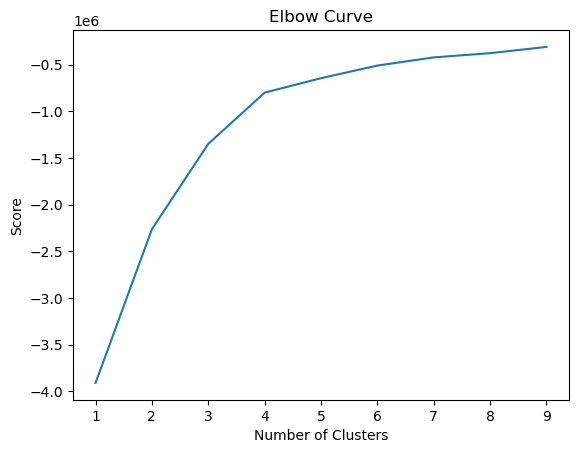

In [90]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

Explain why you chose that number in a markdown cell.

If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

Notes: The elbow, or the breaking point of the curve, is where the curve begins to flatten out. 

If it jumps rapidly from two to three on the x-axis, then rises only slightly after three. What does this mean? That the optimal count for your clusters is just that—three. 

Now, let’s use this knowledge to apply your algorithm!

Here, it jumps rapidly from 1-2-3-4 and this is where the curve begins to flatten out. The optimal count for my clusters is just that- 4 (four).

# 3. k-means clustering

Run the k-means algorithm.

In [91]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [92]:
# Fit the k-means object to the data.

kmeans.fit(listings)

/Users/renataherrera/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [93]:
#creating column in df with values corresponding to clusters 
listings['clusters'] = kmeans.fit_predict(listings)

/Users/renataherrera/Documents/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [94]:
#checking df and viewing colunns created
listings.head()

,price,no_of_reviews,availability_365,host_listings_count,clusters
0,125.0,771,290,2,2
1,65.0,93,102,2,1
2,62.0,1,200,1,0
3,165.0,493,0,1,2
4,255.0,46,364,5,0


In [95]:
#counting the clusters
listings['clusters'].value_counts()

clusters
1    26
0    21
2     7
3     3
Name: count, dtype: int64

Note that every time you run the algorithm, it will assign a different number to the clusters. The clusters themselves won’t change—they will always include the same data points, no matter how many times you run the algorithm. It’s just that the number label ASSIGNED to the cluster could be different. For instance, the number two cluster in the image above has 280 data points. The next time you run this algorithm, it could be the number ONE cluster that has 280 data points.

Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

To note, rather than trying to prove a hypothesis, for instance, “the younger the house and the closer to a metro station, the higher the price,” you’re instead simply looking for possible patterns and insights to explore. 

Sometimes, you’ll have non-linear relationships that can’t be addressed by a linear regression, for instance, in the case of the “House Age” and “Distance to Metro” variables.

This is where a cluster analysis can prove helpful because it offers a different kind of look into your data.

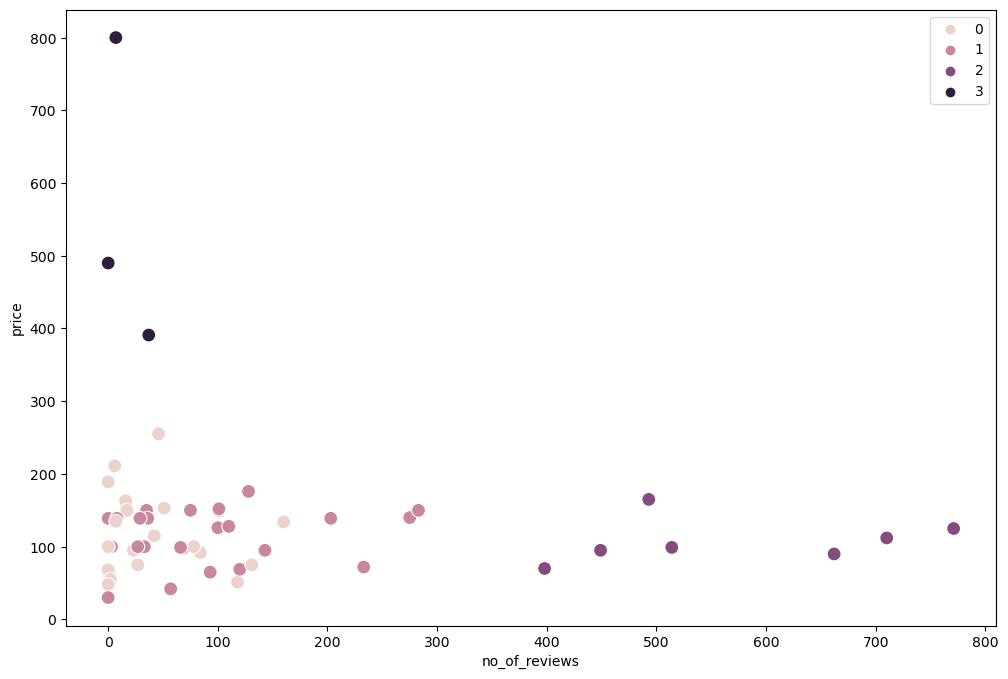

In [96]:
# Plotting the clusters for the "price" and "no of reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings['no_of_reviews'], y=listings['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('no_of_reviews') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

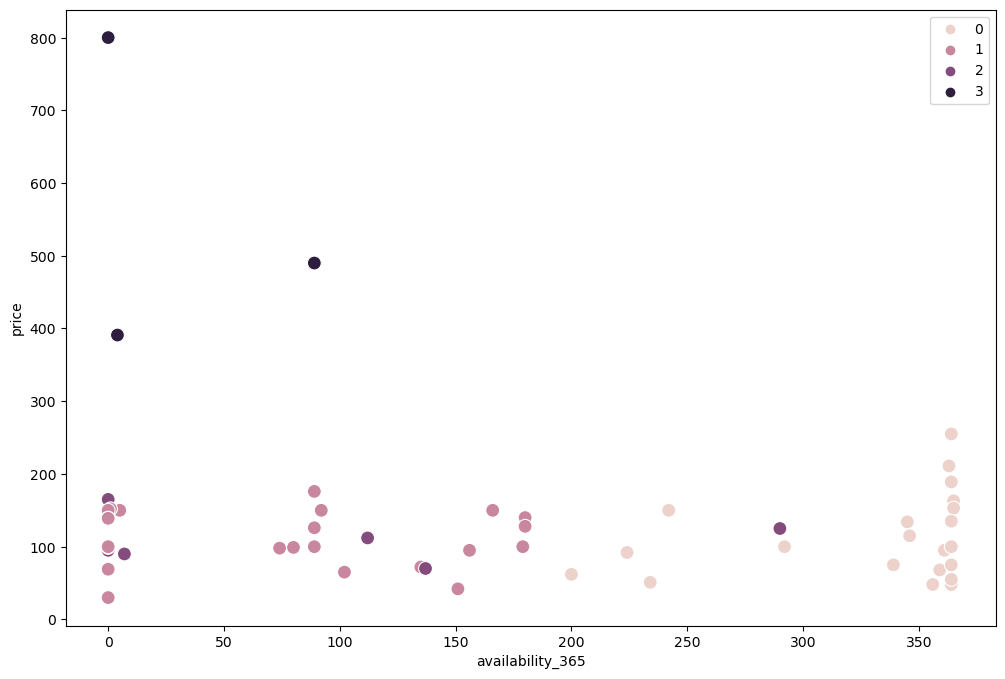

In [97]:
# Plotting the clusters for the "price" and "availability_365" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings['availability_365'], y=listings['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('availability_365') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

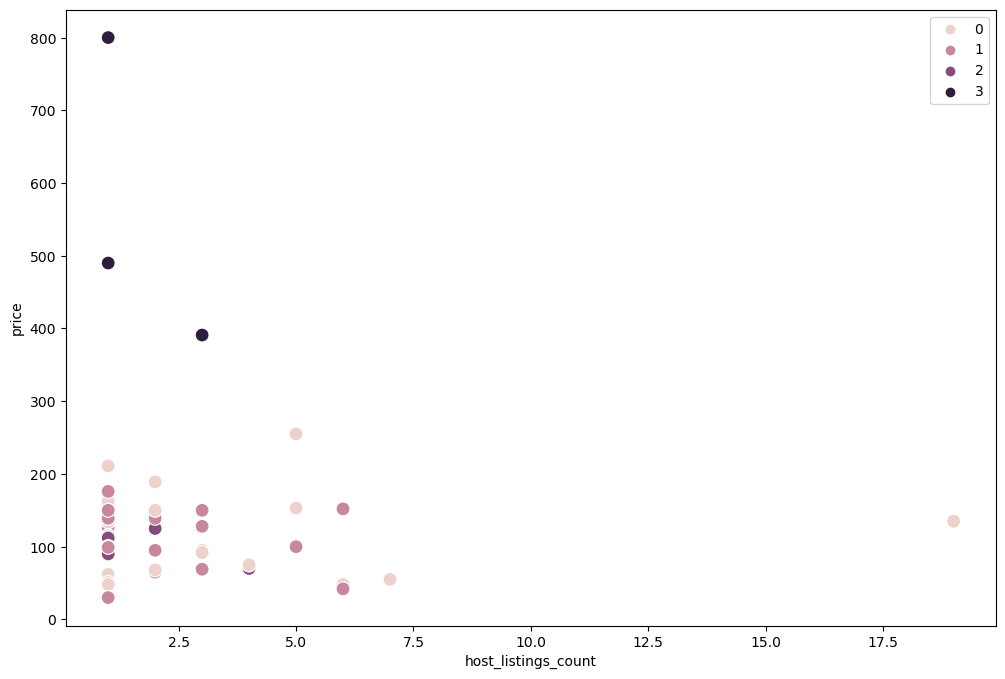

In [98]:
# Plotting the clusters for the "price" and "host_listings_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings['host_listings_count'], y=listings['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('host_listings_count') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
Note down your thoughts in a markdown cell. Agreed, here with this sample set being very small the clusters themselves are 

Here you’re simply letting the algorithm look for patterns and using those patterns to create labels that didn’t previously exist. 

In [99]:
#runnning descriptive stats and renaming clusters
listings.loc[listings['clusters'] == 3, 'clusters'] = 'dark pink'
listings.loc[listings['clusters'] == 2, 'clusters'] = 'dark purple'
listings.loc[listings['clusters'] == 1, 'clusters'] = 'purple'
listings.loc[listings['clusters'] == 0, 'clusters'] = 'pink'

In [101]:
listings.groupby('clusters').agg({'price':['mean', 'median'], 
                         'no_of_reviews':['mean', 'median'], 
                         'availability_365':['mean', 'median']})

price        no_of_reviews        availability_365       
                   mean median          mean median             mean median
clusters                                                                   
dark pink    560.333333  490.0     14.666667    7.0        31.000000    4.0
dark purple  108.000000   99.0    571.000000  514.0        78.000000    7.0
pink         113.047619  100.0     38.523810   17.0       330.428571  361.0
purple       116.384615  133.5     89.615385   71.5        68.000000   77.0

Key Observations & Insight

There are still some limitations in this analysis. For instance, wouldn’t it be much more interesting if you had more columns to explore? In addition, the data set itself is a bit small. To make more accurate conclusions, you’d want to have quite a bit more Airbnb data about an area.

Also, for these clusters to be interpreted you would need to do further analyses and try to incorporate the outliers, as removing them would introduce bias. For example, the other factors may be skew results and show a more rented house in "popularity" based on price, when in fact it is only because of a densely populated neighbourhood within a "popular" area and there are limited options.

Insight

If the data points are concentrated in low values, the factors have minimal impact on overall score, in this case 'price'. Conversely, if data points exhibit a wide spread, it could potentially mean the factors have a greater significance on the overall.

Clusters taking on an upward slope appearnce is suggestive of a postive relationship, possibly indicated with "_" factors and the "price"

When considering descriptive stats, you are comparing the means and medians of these varying factors and how they effect the overall "price" factor. For example, you could potentially rule out that total number of reviews does not influence the price.  

In [102]:
# saving clusters csv to folder
listings.to_csv(os.path.join(path, 'Data','Prepared Data', 'clusters_listings.csv'))